# Problem 1: 
### Clustering using GrLivArea and Garage Area

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
houseData = pd.read_csv('train.csv')

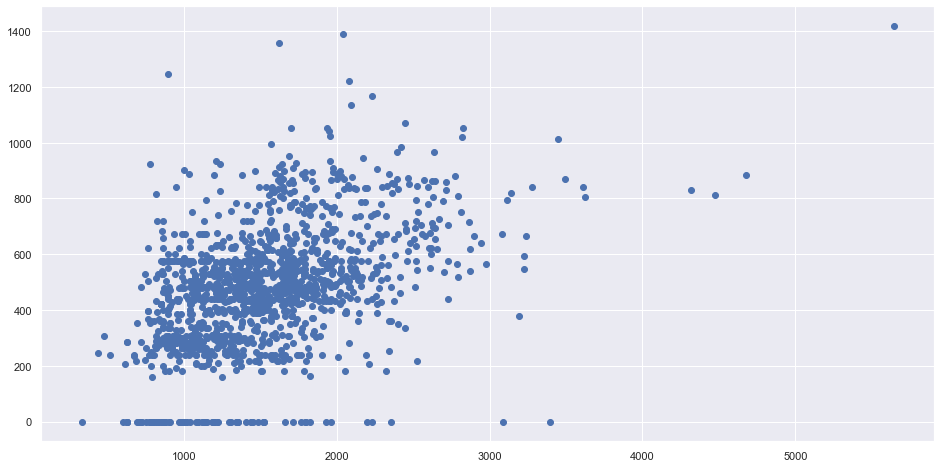

In [3]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

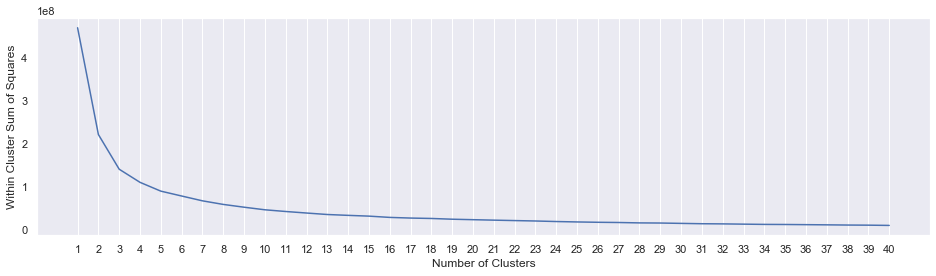

In [4]:
from sklearn.cluster import KMeans

min_clust = 1
max_clust = 40

within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [5]:
from sklearn.cluster import KMeans

num_clust = 3

kmeans = KMeans(n_clusters = num_clust)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	GrLivArea 	GarageArea

Cluster 0:	1085.85	374.89	
Cluster 1:	1695.26	522.5	
Cluster 2:	2567.36	677.88	


In [7]:
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 140802349.44747356


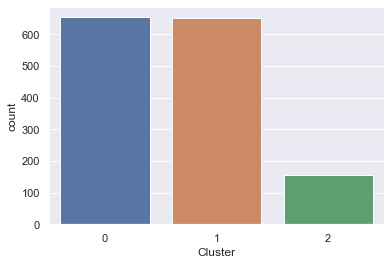

In [8]:
labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

sb.countplot(X_labeled["Cluster"])

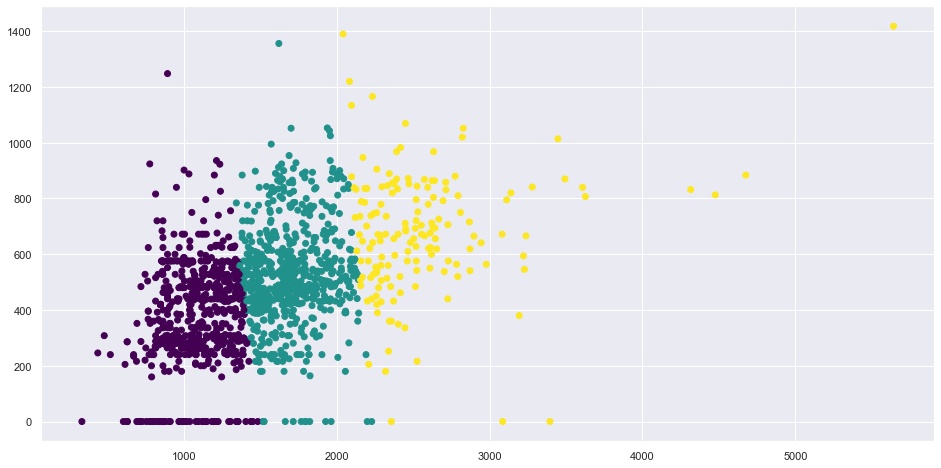

In [9]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

# Problem 2:
### Anomaly Detection with the same Variables

In [10]:
houseData = pd.read_csv('train.csv')

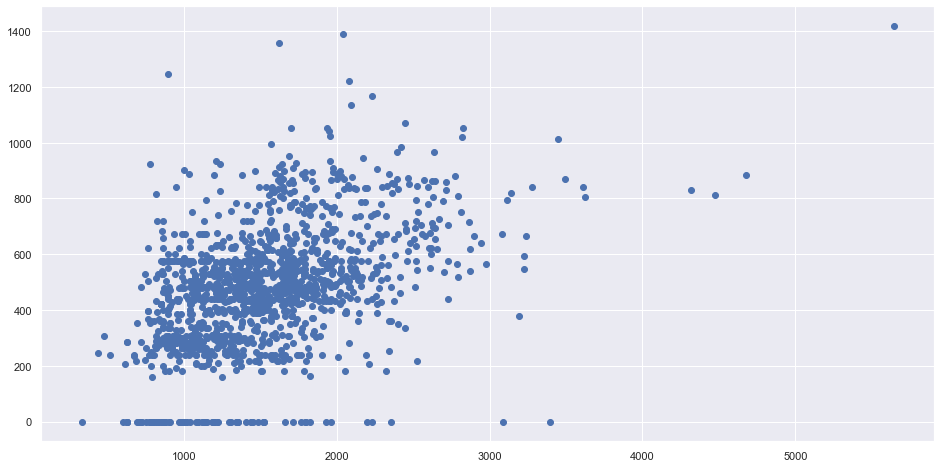

In [11]:
X = pd.DataFrame(houseData[['GrLivArea', 'GarageArea']])

f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

In [12]:
from sklearn.neighbors import LocalOutlierFactor

num_neighbors = 20   
cont_fraction = 0.05   

lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

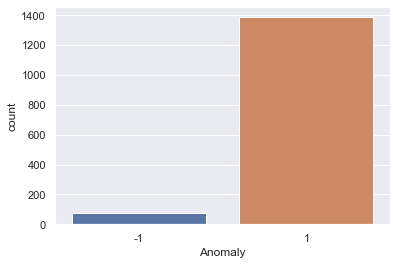

In [13]:
labels = lof.fit_predict(X)

X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

sb.countplot(X_labeled["Anomaly"])

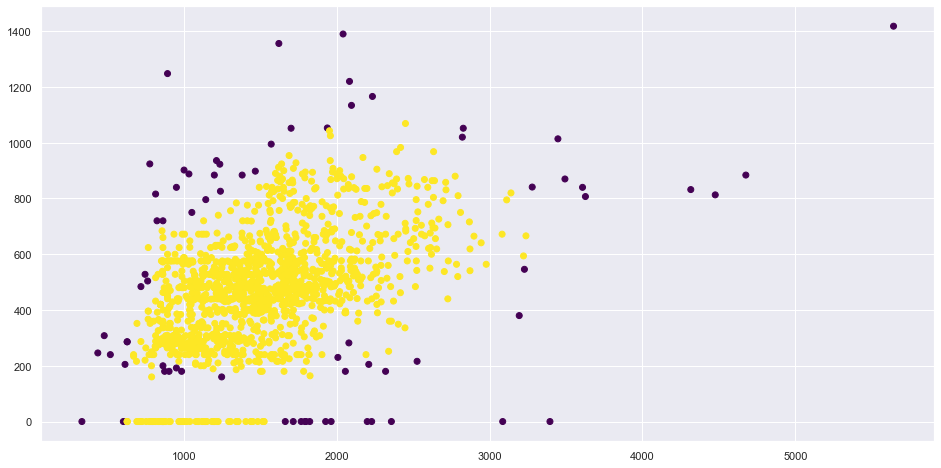

In [14]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)

### After Clustering and Anomaly Detection, comment on your choice of Number of Clusters and LOF Parameters.
#### I chose the number of clusters to be 3 by using the elbow plot to observe the last kink in the graph, before there seems to be little to no changes in the graph.
#### I chose the number of neighbours to be 20 and the contamination fraction to be about 5% as it results in better clustering of non-outliers after repeated adjustment of the parameters.